In [3]:
# pip install opencv-python

# Imports

In [ ]:
Lines detect: 65
0.0 - perfect;y jprozpmta;
0.0
0.0
81.95390899254761
0.8466740238615051
58.96489135099732
0.6700955222245337
68.99169171390118
5.2192645279882255
0.0
0.0
59.03624346792648
0.0
74.92603266107407
79.94269108503619
10.124671655397817
68.94122105442914
0.0
79.93931020467704
80.89539913459782
58.00842633117985
1.7899106082460694
1.8881880067409305
3.878524502847706
4.969740728110304
0.9963478965049255
0.0
5.194428907734806
75.0101376403182
81.82187101877439
68.1569208631672
80.01817071226684
13.902687114220553
12.582962494076924
16.11341823308929
68.9326163080915
0.0
60.190885793293475
68.9076604941725
77.34744349944204
79.23185543889217
9.716685817785104
89.17367586027076
81.52885536698517
81.52885536698517
82.0106732336031
10.757967088390004
75.96375653207353
80.99149625797484
75.1243179983612
12.907408671265838
0.0
58.134022306396325
75.10461034562795
75.96375653207353
68.87076688722189
4.44738485009049
80.01503979535667
75.83294447736881
75.89168640717413
76.72935612359633
76.72935612359633
76.07903963507925
81.34745820888527
85.51539399045538
81.70285503016314
68.29946326068254


In [20]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hough Line Transform

In [32]:
def create_mask_score_bar(gray, display=False):
    # Define a mask to cover the score bar (adjust the rectangle as needed)
    # Here, we're assuming that the score bar is at the bottom of the image and covers about 10% of the image height
    mask_height = int(gray.shape[0] * 0.86)
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.rectangle(mask, (0, 0), (gray.shape[1], mask_height), (255), thickness=-1)
    
    # Apply the mask to the grayscale image
    masked_gray = cv2.bitwise_and(gray, mask)
    
    if display:
        # Display the mask
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(mask, cmap='gray')
        plt.title("Mask")

        # Display the image after masking
        plt.subplot(1, 2, 2)
        plt.imshow(masked_gray, cmap='gray')
        plt.title("Image After Masking")

        plt.show()
    
    return masked_gray

In [38]:
def create_mask_color_range(img, display=False):
    # Convert image to HSV for color filtering
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Define color range for white (yard lines) - may need tuning
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([255, 55, 255])
    mask_color = cv2.inRange(hsv, lower_white, upper_white)
    
    # Apply a morphological opening to the color mask to remove noise
    kernel = np.ones((5,5), np.uint8)
    mask_color_opened = cv2.morphologyEx(mask_color, cv2.MORPH_OPEN, kernel)
    
    # Apply the mask to the grayscale image
    res = cv2.bitwise_and(img, img, mask=mask_color_opened)
    
    if display:
        # Display the mask
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='hsv')
        plt.title("Mask")

        # Display the image after masking
        plt.subplot(1, 2, 2)
        plt.imshow(hsv, cmap='hsv')
        plt.title("Image After Masking")

        plt.show()
    
    return res

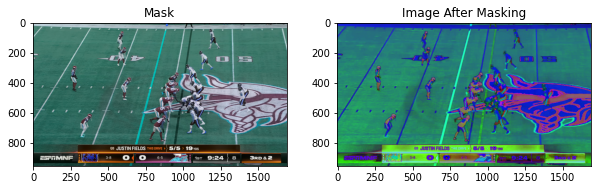

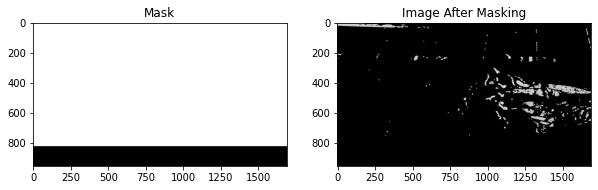

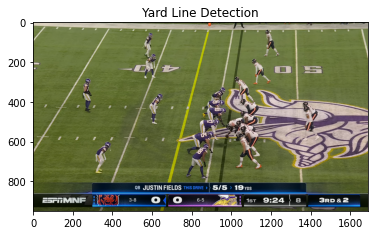

In [39]:
def detect_yard_lines(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found.")
        return
    
    # color filtering
    res = create_mask_color_range(img, display=True)

    # Convert image to grayscale
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    
    # mask out score bar
    masked_gray = create_mask_score_bar(gray, display=True)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blur = cv2.GaussianBlur(masked_gray, (5, 5), 0)

    # Apply Canny edge detector
    edges = cv2.Canny(blur, 50, 150, apertureSize=3)


    # Use Probabilistic Hough Line Transform to detect lines
    minLineLength = img.shape[1] * 0.5  # at least half the width of the image
    maxLineGap = 20  # maximum gap between line segments
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=minLineLength, maxLineGap=maxLineGap)
    
    # Draw the lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Check if the line is approximately horizontal
            if abs(y2 - y1) < 0.1 * abs(x2 - x1):
                cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Yard Line Detection")
    plt.show()

# Path to your image
image_path = './test_image.png'
detect_yard_lines(image_path)